In [129]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 



# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA


# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1)
%matplotlib inline 

In [130]:
location = r"C:\Users\madhu\Kaggle_kernels\datasets\data_spotify.csv"
spotify = pd.read_csv(location)
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [131]:
spotify.shape

(2017, 17)

In [132]:
spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [133]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [136]:
spotify = spotify.replace('?', np.nan)
spotify = spotify.dropna()

In [137]:
spotify.shape

(2017, 17)

In [138]:
spotify.key.value_counts()

1     257
0     216
7     212
9     191
11    187
2     184
5     166
6     159
10    141
8     136
4     105
3      63
Name: key, dtype: int64

In [139]:
pos_tempo = spotify[spotify.target==1]['tempo']
neg_tempo = spotify[spotify.target==0]['tempo']

pos_dance = spotify[spotify.target==1]['danceability']
neg_dance = spotify[spotify.target==0]['danceability']

pos_duration = spotify[spotify.target==1]['duration_ms']
neg_duration = spotify[spotify.target==0]['duration_ms']

pos_loudness = spotify[spotify.target==1]['loudness']
neg_loudness = spotify[spotify.target==0]['loudness']

pos_speechiness = spotify[spotify.target==1]['speechiness']
neg_speechiness = spotify[spotify.target==0]['speechiness']

pos_valence = spotify[spotify.target==1]['valence']
neg_valence = spotify[spotify.target==0]['valence']

pos_energy = spotify[spotify.target==1]['energy']
neg_energy = spotify[spotify.target==0]['energy']

pos_acousticness = spotify[spotify.target==1]['acousticness']
neg_acousticness = spotify[spotify.target==0]['acousticness']

pos_key = spotify[spotify.target==1]['key']
neg_key = spotify[spotify.target==0]['key']

pos_instrumentalness = spotify[spotify.target==1]['instrumentalness']
neg_instrumentalness = spotify[spotify.target==0]['instrumentalness']

In [140]:
# Custom color palette
red_blue = ['#19B5FE', '#EF4836']
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style('white')
sns.set(font_scale=1.0)

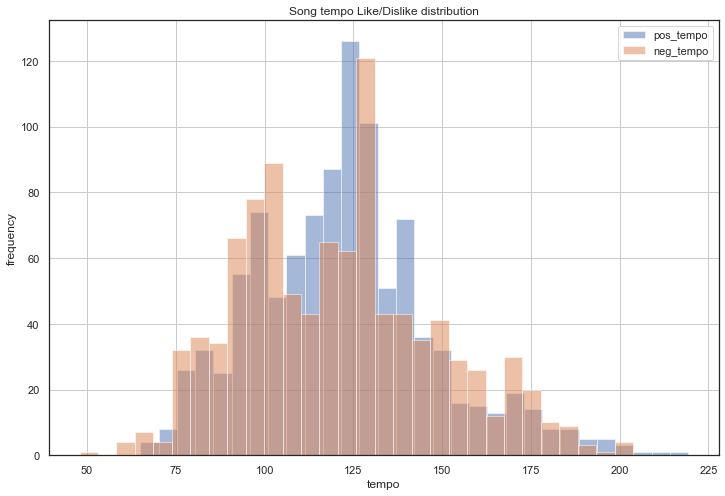

In [141]:
fig = plt.figure(figsize=(12,8))
sns.set(style='white')
plt.title("Song tempo Like/Dislike distribution")
pos_tempo.hist(bins=30, label='pos_tempo', alpha=0.5)
neg_tempo.hist(bins=30, label='neg_tempo', alpha=0.5)
plt.xlabel('tempo')
plt.ylabel('frequency')
plt.legend()


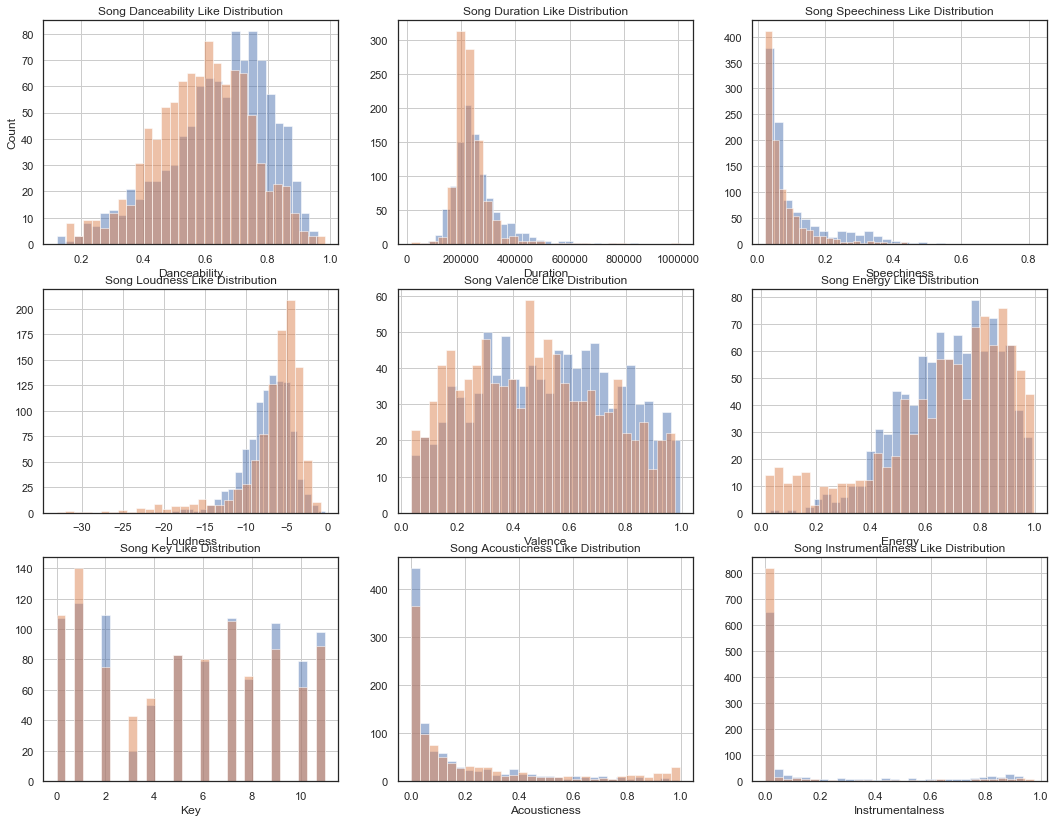

In [142]:
fig2 = plt.figure(figsize=(18,14))
sns.set(style='white')

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(bins=30, alpha=0.5)
ax4 = fig2.add_subplot(331)
neg_dance.hist(bins=30, alpha=0.5)


# Duration
ax5 = fig2.add_subplot(332)
ax5.set_xlabel('Duration')
#ax5.set_ylabel('Count')
ax5.set_title('Song Duration Like Distribution')
pos_duration.hist(bins=30, alpha=0.5)
ax6 = fig2.add_subplot(332)
neg_duration.hist(bins=30, alpha=0.5)

# Speechiness
ax7 = fig2.add_subplot(333)
ax7.set_xlabel('Speechiness')
ax7.set_title('Song Speechiness Like Distribution')
pos_speechiness.hist(bins=30, alpha=0.5)
ax8 = fig2.add_subplot(333)
neg_speechiness.hist(alpha=0.5, bins=30)

# Loudness
ax9 = fig2.add_subplot(334)
ax9.set_xlabel('Loudness')
ax9.set_title('Song Loudness Like Distribution')
pos_loudness.hist(bins=30, alpha=0.5)
ax10 = fig2.add_subplot(334)
neg_loudness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
ax11.set_xlabel('Valence')
ax11.set_title('Song Valence Like Distribution')
pos_valence.hist(bins=30, alpha=0.5)
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
ax13.set_xlabel('Energy')
ax13.set_title('Song Energy Like Distribution')
pos_energy.hist(bins=30, alpha=0.5)
ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
ax15.set_xlabel('Key')
ax15.set_title('Song Key Like Distribution')
pos_key.hist(bins=30, alpha=0.5)
ax16 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax15 = fig2.add_subplot(338)
ax15.set_xlabel('Acousticness')
ax15.set_title('Song Acousticness Like Distribution')
pos_acousticness.hist(bins=30, alpha=0.5)
ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax15 = fig2.add_subplot(339)
ax15.set_xlabel('Instrumentalness')
ax15.set_title('Song Instrumentalness Like Distribution')
pos_instrumentalness.hist(bins=30, alpha=0.5)
ax16 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

In [143]:
spotify.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

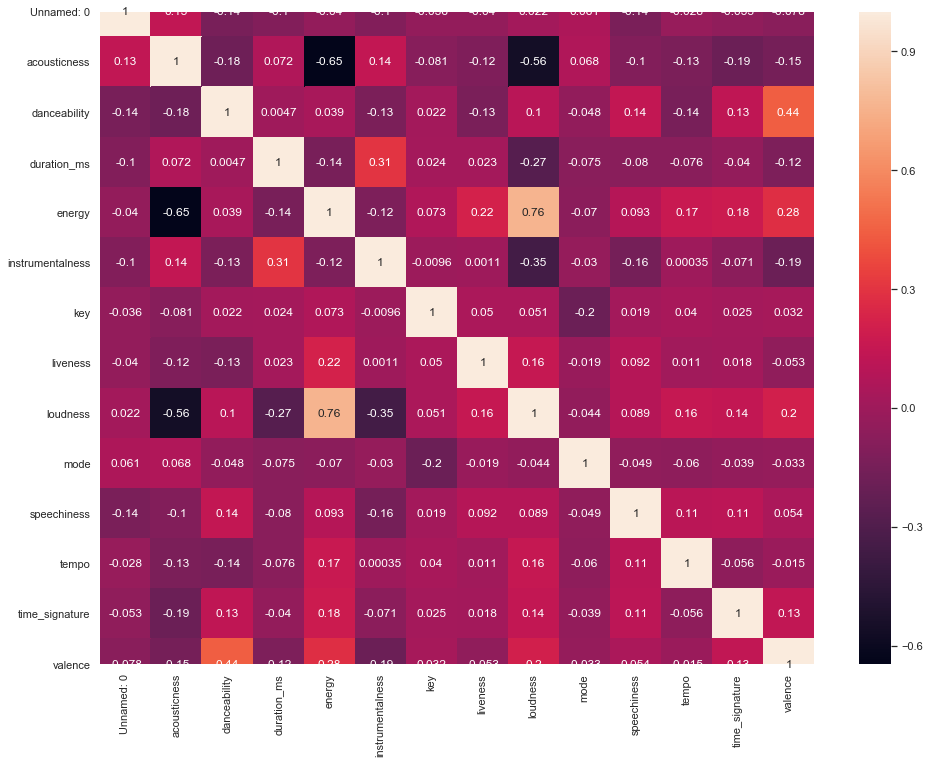

In [144]:
plt.figure(figsize=(16,12))
sns.heatmap(spotify.drop('target', 1).corr(),annot=True)

In [145]:
spotify = spotify.drop(['Unnamed: 0', 'song_title', 'mode', 'time_signature', 'artist', 'loudness', 'acousticness', 'tempo', 'valence'], 1)

In [146]:
spotify.columns

Index(['danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'speechiness', 'target'],
      dtype='object')

In [213]:
scaler = RobustScaler()

In [214]:
X = spotify.drop('target', 1)
y = spotify['target']
X_S = scaler.fit_transform(X)
X_S = pd.DataFrame(X_S, columns=['danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'speechiness'])
X_train, X_test, y_train, y_test = train_test_split(X_S, y, test_size=0.2, random_state=24)
print(X)
print(X_S)

      danceability  duration_ms  energy  instrumentalness  key  liveness  \
0            0.833       204600   0.434          0.021900    2    0.1650   
1            0.743       326933   0.359          0.006110    1    0.1370   
2            0.838       185707   0.412          0.000234    2    0.1590   
3            0.494       199413   0.338          0.510000    5    0.0922   
4            0.678       392893   0.561          0.512000    5    0.4390   
...            ...          ...     ...               ...  ...       ...   
2012         0.584       274404   0.932          0.002690    1    0.1290   
2013         0.894       182182   0.892          0.001670    1    0.0528   
2014         0.637       207200   0.935          0.003990    0    0.2140   
2015         0.557       185600   0.992          0.677000    1    0.0913   
2016         0.446       204520   0.915          0.000039    9    0.2180   

      speechiness  
0          0.4310  
1          0.0794  
2          0.2890  
3      

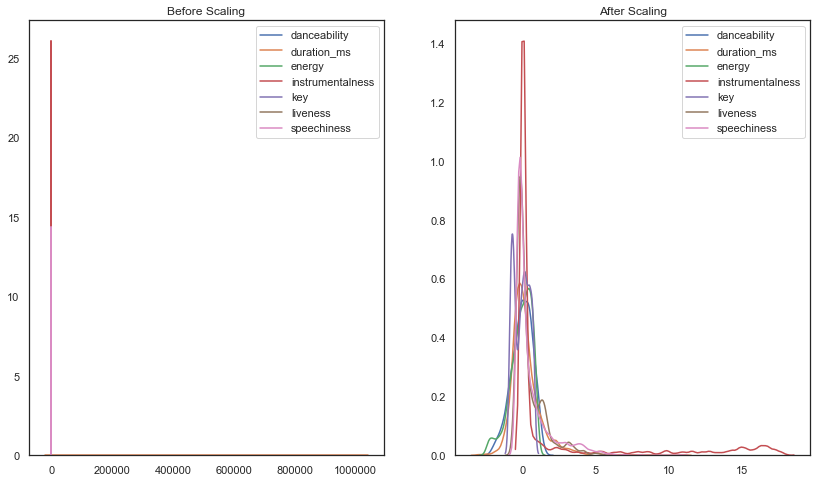

In [215]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,8))
sns.set(style='white')

ax1.set_title('Before Scaling')
sns.kdeplot(X['danceability'], ax=ax1)
sns.kdeplot(X['duration_ms'], ax=ax1)
sns.kdeplot(X['energy'], ax=ax1)
sns.kdeplot(X['instrumentalness'], ax=ax1)
sns.kdeplot(X['key'], ax=ax1)
sns.kdeplot(X['liveness'], ax=ax1)
sns.kdeplot(X['speechiness'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_S['danceability'], ax=ax2)
sns.kdeplot(X_S['duration_ms'], ax=ax2)
sns.kdeplot(X_S['energy'], ax=ax2)
sns.kdeplot(X_S['instrumentalness'], ax=ax2)
sns.kdeplot(X_S['key'], ax=ax2)
sns.kdeplot(X_S['liveness'], ax=ax2)
sns.kdeplot(X_S['speechiness'], ax=ax2)
plt.show()

In [216]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
max_depths

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [217]:
train_results = []
test_results  = []
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [218]:
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Add auc score to previous test results
    test_results.append(roc_auc)

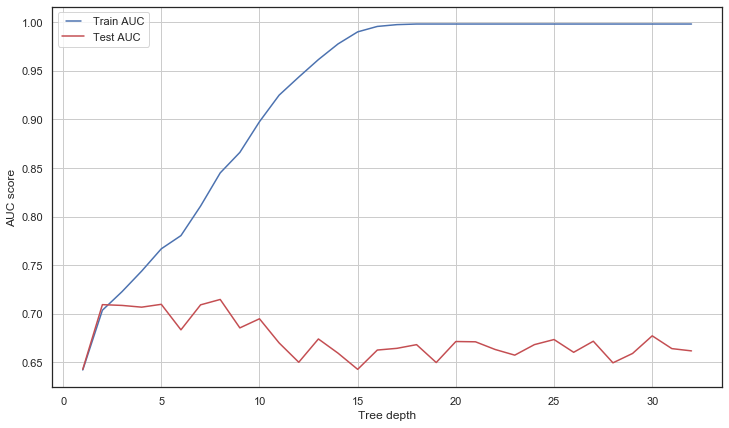

In [219]:
#  model overfits for large depth values. The tree perfectly predicts all of the train data, 
# however, it fails to generalize the findings for new data

plt.figure(figsize=(12,7))
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(max_depths, test_results,  'r', label= 'Test AUC')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')

plt.grid()
plt.show()

In [220]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

In [221]:
train_results = []
test_results = []

In [222]:
for min_samples_split in min_samples_splits:
    
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    test_results.append(roc_auc)

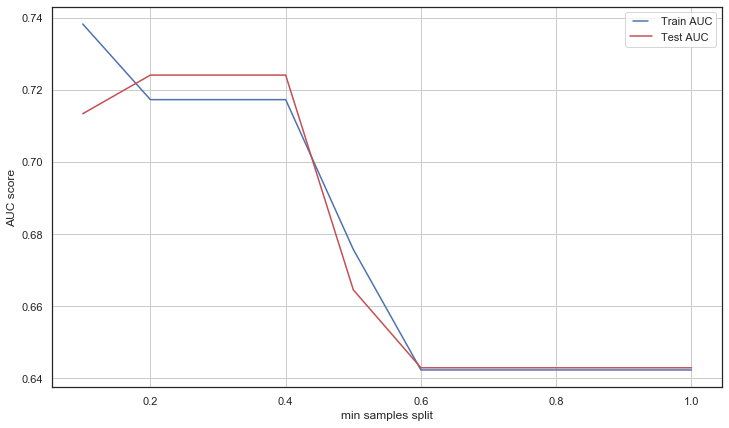

In [223]:
# when we consider 100% of the samples at each node, the model cannot learn enough about 
# the data. This is an underfitting case.
plt.figure(figsize=(12,7))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label=  'Test AUC')


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.grid()
plt.show()

In [224]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_split=0.16)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [225]:
confusion_matrix(y_test, y_pred)

array([[116,  74],
       [ 41, 173]], dtype=int64)

In [226]:
print("Accuracy score  : ", accuracy_score(y_test, y_pred))
print("Precision score : ", precision_score(y_test, y_pred) )
print("Recall score    : ", recall_score(y_test, y_pred))

Accuracy score  :  0.7153465346534653
Precision score :  0.7004048582995951
Recall score    :  0.8084112149532711
